# 🔴 Step by step practising

## Import Libraries

In [ ]:
from langchain.agents import create_agent
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings


from pydantic import BaseModel
from typing_extensions import List , Annotated
from typing import Literal
from langchain_core.messages import HumanMessage , AIMessage , AnyMessage , SystemMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser , JsonOutputParser
from langchain_core.runnables import RunnablePassthrough 
from langchain_classic.text_splitter import RecursiveCharacterTextSplitter
from langchain_classic.schema import Document
from langchain_classic.vectorstores import FAISS
from langchain_classic.tools import Tool , tool
from langchain_experimental.text_splitter import SemanticChunker
from langgraph.graph import START , END , StateGraph
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.prebuilt import ToolNode
from langgraph.graph.message import add_messages

import json
from IPython.display import display , Markdown , Image
from dotenv import load_dotenv
load_dotenv()

d:\Artifitial_intelligence\GEN_AI\Practical & Codes\PRACTICAL\AI_Agents_practise_2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
def pdisplay(text) : 
    print(display(Markdown(text)))

# 🧠 Foundation Layer

## Model InitializationModel Initialization

LLM selection strategy (OpenAI / Anthropic / Local)

Chat vs Completion models

Temperature, top-p, max tokens

Streaming vs non-streaming

Structured output models

In [3]:
# Chat Model
llm = ChatGroq(
    model="openai/gpt-oss-120b",
    temperature=0 , 
    max_tokens=500
)

test_query = "What is the NLP ?"

# Invoking
print(llm.invoke(test_query).content)
print("-"*20)

# Streaming 
for token in llm.stream(test_query) : 
    if token.content: 
        print(token.content,end="", flush=True)

**Natural Language Processing (NLP)** is a sub‑field of artificial intelligence (AI) and computational linguistics that focuses on enabling computers to understand, interpret, generate, and interact with human language in a way that is both meaningful and useful.

---

## 1. Core Idea
- **Goal:** Bridge the gap between human communication (spoken or written language) and computer systems.
- **Scope:** From low‑level tasks like tokenizing a sentence into words, to high‑level tasks such as answering questions, translating between languages, or generating creative text.

---

## 2. Main Components & Tasks

| **Category** | **Typical Tasks** | **What It Involves** |
|--------------|-------------------|----------------------|
| **Lexical / Morphological** | Tokenization, stemming, lemmatization, part‑of‑speech tagging | Breaking text into units, normalizing word forms, labeling grammatical roles |
| **Syntactic** | Parsing (dependency, constituency), chunking | Analyzing grammatical structu

In [ ]:
# Structured outputs
sys_msg_for_Structured_outputs = SystemMessage(content="You are a helpful assistant. Always Reply to the user Question in JSON Format.Return only the the JSON Without any additional text")
humn_msg_for_Structured_outputs = "What is NLP?"
# JSON
json_format = JsonOutputParser()
response = llm.invoke([sys_msg_for_Structured_outputs,humn_msg_for_Structured_outputs,AIMessage(content="")])
parsed_response = json_format.parse(response.content)

print(parsed_response)

{'definition': 'Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and human language, enabling machines to understand, interpret, generate, and respond to text or speech.'}


In [ ]:
# Pydantic
class Response (BaseModel) : 
    Answer : str

llm_with_structured_output = llm.with_structured_output(schema=Response)
response = llm_with_structured_output.invoke([sys_msg_for_Structured_outputs,humn_msg_for_Structured_outputs,AIMessage(content="")])
print(response.Answer)

NLP stands for Natural Language Processing, a subfield of artificial intelligence and linguistics that focuses on enabling computers to understand, interpret, generate, and interact with human language. It involves tasks such as text classification, sentiment analysis, machine translation, speech recognition, and question answering, using techniques ranging from rule-based methods to modern deep learning models.


# 🤖 Agent Foundations

## Create Agent

create_react_agent

create_tool_calling_agent

Custom agent prompts

Agent output parsers

In [ ]:
# Custom Agent Prompts
sys_prompt = "You are a helpful assistant."
humn_prompt = HumanMessage(content="i want to calcultae the consumption rating for l is 23 , w is 4 , and h is 9")

In [ ]:
basic_agent = create_agent(
    model = llm ,
    system_prompt=sys_prompt
)

In [ ]:
response = basic_agent.invoke({"messages": [humn_prompt]})
pdisplay(response['messages'][-1].content)

Sure! If the “consumption rating” you’re after is simply the product of the three dimensions (i.e., the volume of a rectangular prism), you just multiply length × width × height:

\[
\text{Consumption Rating} = L \times W \times H
\]

Plugging in your numbers:

\[
\begin{aligned}
L &= 23 \\
W &= 4 \\
H &= 9 \\
\text{Consumption Rating} &= 23 \times 4 \times 9 \\
&= (23 \times 4) \times 9 \\
&= 92 \times 9 \\
&= 828
\end{aligned}
\]

**Result:** The consumption rating is **828** (in whatever cubic‑unit your dimensions are measured in).

---

### Quick checklist

| Variable | Value |
|----------|-------|
| Length (L) | 23 |
| Width (W)  | 4 |
| Height (H) | 9 |
| **Rating** | **828** |

If “consumption rating” means something else in your context (e.g., a power‑usage factor, a specific industry formula, etc.), just let me know the exact definition and I can adjust the calculation accordingly!

None


In [ ]:
@tool
def calc_vol(l:int , w:int , h:int) : 
    """calculate consumption rating"""
    const = 25
    mul = l*w*h
    return mul*const

tool_agent = create_agent(
    model = llm ,
    system_prompt=sys_prompt,
    tools=[calc_vol]
)

In [ ]:
response = tool_agent.invoke({"messages": [humn_prompt]})
pdisplay(response['messages'][-1].content)

The consumption rating for the given dimensions (L = 23, W = 4, H = 9) is **20,700**.

None


## Tools

Tool definition patterns

Tool schemas

Tool calling vs tool routing

Search tools

Calculator tools

Database tools

Retrieval as a tool

Tool error handling

## Agent Class

Stateless vs stateful agents

Agent as function

Agent as class

Typed agent state

Agent lifecycle hooks

Agent error recovery

In [ ]:
class AgentState : 
    messages : Annotated[ List[AnyMessage] , add_messages]

## Memory

Conversation buffer memory

Summary memory

Token-bounded memory

Long-term memory

Vector-based memory

Episodic vs semantic memory

Memory pruning strategies

In [ ]:
memory_agent = create_agent(
    model = llm ,
    system_prompt=sys_prompt,
    checkpointer=InMemorySaver()
)

In [ ]:
config = {'configurable' : {'thread_id':'1'}}

In [ ]:
response = memory_agent.invoke({"messages": [HumanMessage(content="What is the Metal Surface treatment ?")]},config)
pdisplay(response['messages'][-1].content)

## Metal Surface Treatment – An Overview  

Metal surface‑treatment (sometimes called **surface finishing**) is any process that modifies the outermost layer of a metal part to improve its performance, appearance, or durability.  The treatment can be **mechanical, chemical, electro‑chemical, thermal, or a combination** of these.  

Below is a structured guide that covers the why, what, and how of metal surface treatment.

---

### 1. Why Treat Metal Surfaces?

| Goal | Typical Benefits |
|------|-------------------|
| **Corrosion resistance** | Prevents rust, oxidation, and chemical attack. |
| **Wear & abrasion resistance** | Extends service life in high‑friction environments. |
| **Improved adhesion** | Prepares the surface for paints, adhesives, or subsequent coatings. |
| **Electrical/thermal performance** | Enhances conductivity, reduces contact resistance, or provides insulation. |
| **Aesthetic appeal** | Gives a uniform colour, gloss, or texture (e.g., chrome‑plated car parts). |
| **Dimensional stability / hardness** | Increases surface hardness without affecting bulk properties. |
| **Cleaning & contaminant removal** | Eliminates oils, oxides, scale, and other residues. |

---

### 2. Main Categories of Surface‑Treatment Processes  

| Category | Typical Methods | Typical Metals | Key Outcomes |
|----------|----------------|----------------|--------------|
| **Mechanical** | • Abrasive blasting (sand, glass bead, shot) <br>• Grinding / polishing <br>• Shot peening <br>• Laser texturing | All metals | Surface roughness control, stress relief, improved coating adhesion. |
| **Chemical / Electro‑chemical** | • Pickling (acid cleaning) <br>• Passivation (e.g., nitric acid for

None


In [ ]:
response = memory_agent.invoke({"messages": [HumanMessage(content="is it dangrous ?")]},config)
pdisplay(response['messages'][-1].content)

### Is Metal Surface‑Treatment Dangerous?

Metal‑surface‑treatment processes can involve **hazardous chemicals, high temperatures, high pressures, electrical currents, and mechanical energy**. Whether a particular operation is “dangerous” depends on the specific method, the materials used, the scale of the operation, and the safety measures that are in place.

Below is a concise risk‑assessment for the most common surface‑treatment families, followed by practical safety‑control recommendations you can apply in a workshop, plant, or laboratory setting.

---

## 1. Typical Hazards by Process Type  

| Process | Primary Hazards | Why They Occur | Typical Exposure Scenarios |
|---------|----------------|----------------|----------------------------|
| **Abrasive blasting (sand, glass bead, shot)** | • Inhalation of dust/particulates <br>• Eye injury from flying media <br>• Noise (≥85 dB) | Fine particles become airborne; high‑velocity media can ricochet. | Workers standing near the blast cabinet, cleaning the booth, or handling spent media. |
| **Grinding / polishing** | • Metal dust (e.g., Fe, Cr, Ni) <br>• Sparks → fire/explosion <br>• Hand‑arm vibration | Friction generates fine particles and hot sparks. | Continuous grinding of steel, stainless steel, or aluminum. |
| **Pickling (acid cleaning)** | • Corrosive acid burns (HCl, H₂SO₄) <br>• Toxic fumes (HCl, SO₂) <br>• Heat generation | Strong acids react with metal oxides, releasing gases and heat. | Immersing parts in acid baths, transferring containers. |
| **Passivation (nitric acid for stainless steel)** | • Oxidizing acid burns <br>• Nitrogen oxides (NOx) inhalation <br>• Chemical splashes | Concentrated HNO₃ is a strong oxidizer; NOx gases are irritating. | Dipping or spraying parts, draining spent solution. |
| **Electro‑plating (e.g., chrome, nickel, zinc)** | • Heavy‑metal exposure (Cr

None


# 🧩 Graph & Orchestration

## Graph Fundamentals (LangGraph)

Nodes

Edges

State

Entry point

End states

Conditional routing

Cycles & loops

In [ ]:
# state
class AgentState(BaseModel) : 
    query : str
    enhancmented_query : str = ""
    basic_answer : str = ""
    should_End : bool = False
    reflection_statement: str = ""
    final_answer : str = ""
    messages : Annotated[ List[AnyMessage] , add_messages]

class ReflectionState(BaseModel): 
    reflection_statement: str 
    should_End: bool 

Start ---> Query Enhancment ---> invoke query ---> reflection model ---> End

In [ ]:
QueryEnhancmentAgent_sys_msg = """You are QueryEnhancementAgent, an expert at understanding and refining user queries.
Your task is to rewrite the user’s query into a single, clear, explicit, and well-structured query that preserves the original intent while removing ambiguity and vagueness.
Rules:
Return only one enhanced query.
Keep the original language.
If the query is Arabic, include a clearer Arabic formulation (do not explain).
Do not answer the query.
Do not add explanations, metadata, labels, or formatting.
Do not return alternatives.
Do not mention databases, retrieval, or AI systems.

Output format:
Output only the enhanced query text.
No prefixes, no markdown, no quotes.

Behavior:
Expand unclear terms when necessary.
Make implicit intent explicit.
Preserve meaning exactly."""


invokeQuery_sys_msg = """You are AnswerQueryAgent, an expert at providing clear, concise, and accurate answers to user queries or questions.
Rules:
Always answer the user’s query directly.
Output only the answer.
Keep the original language of the query.
If the query is ambiguous, answer the most likely intent without asking follow-up questions.
Do not include explanations of your reasoning, metadata, labels, or formatting.
Do not output multiple answers.
Do not reference databases, retrieval, or AI systems.
Keep the answer truthful, precise, and complete to the best of your knowledge.

Output format :
Plain text only.
Single, self-contained answer.
No prefixes, no markdown, no quotes."""

reflectionModel_sys_msg = """You are ReflectionModel. Your goal is to evaluate if the answer is accurate and complete.

You MUST respond in this exact JSON format:
{
    "reflection_statement": "Your critique here or 'None' if satisfied",
    "should_End": true
}

Rules:
- If the answer is correct and clear, set "should_End" to true.
- If the answer needs improvement, set "should_End" to false and provide feedback.
- Do not loop forever. If the answer is 'good enough', set "should_End" to true."""

writer_sys_msg = """You are a Writer Agent. Your task is to take the current 'final_answer' from the state and improve it for clarity, structure, and readability.  

Guidelines:
- Preserve the original meaning of the answer.  
- Make the text well-structured, concise, and easy to understand.  
- Correct grammar, punctuation, and formatting issues.  
- Enhance flow and coherence without adding new information.  
- Do not change any other fields in the state."""

In [ ]:
# Agents

QueryEnhancmentAgent = create_agent(
    model=llm , 
    name="QueryEnhancmentAgent",
    system_prompt = QueryEnhancmentAgent_sys_msg
)

invokeQueryAgent = create_agent(
    model=llm , 
    name="invokeQueryAgent",
    system_prompt = invokeQuery_sys_msg
)

reflectionAgent = llm.bind(response_format={"type": "json_object"})

writerAgent = create_agent(
    model=llm , 
    name = "writerAgent" ,
    system_prompt=writer_sys_msg
)

In [ ]:
def QueryEnhancment(state: AgentState) -> dict: 
    response = QueryEnhancmentAgent.invoke({"messages": [HumanMessage(content=state.query)]})
    return {
        "enhancmented_query": response["messages"][-1].content,
        "messages": [HumanMessage(content=state.query)]
    }

def invokeQuery(state: AgentState) -> dict: 
    feedback = state.reflection_statement
    
    if not feedback or feedback == "":
        prompt = [HumanMessage(content=state.enhancmented_query)]
    else:
        prompt = [
            HumanMessage(content=state.enhancmented_query),
            AIMessage(content=state.basic_answer),
            HumanMessage(content=f"The previous answer was critiqued: {feedback}. Please provide a corrected, improved version.")
        ]
    
    res = invokeQueryAgent.invoke({"messages": prompt})
    return {"basic_answer": res["messages"][-1].content}

def reflection(state: AgentState) -> dict:
    messages = [
        SystemMessage(content=reflectionModel_sys_msg),
        HumanMessage(content=f"Evaluate this answer: {state.basic_answer}")
    ]
    
    response = reflectionAgent.invoke(messages)
    data = json.loads(response.content)
    
    return {
        "reflection_statement": data.get("reflection_statement", ""),
        "should_End": data.get("should_End", True)
    }

def writer(state: AgentState) -> dict: 
    response = writerAgent.invoke({"messages": [HumanMessage(content=state.basic_answer)]})
    ans = response["messages"][-1].content
    return {
        "final_answer": ans,
        "messages": [AIMessage(content=ans)]
    }

In [ ]:
# Helper Function
def Routing (state:AgentState) -> Literal['invokeQuery','writer']: 
    if state.should_End == True : 
        return 'writer'
    else : 
        return 'invokeQuery'

In [ ]:
# graph

graph = StateGraph(AgentState)

graph.add_node("QueryEnhancment",QueryEnhancment)
graph.add_node("invokeQuery",invokeQuery)
graph.add_node("reflection",reflection)
graph.add_node("writer",writer)

graph.add_edge(START,"QueryEnhancment")
graph.add_edge("QueryEnhancment","invokeQuery")
graph.add_edge("invokeQuery","reflection")
graph.add_conditional_edges(
    "reflection",
    Routing ,
    {
        "writer" : "writer" ,
        "invokeQuery" : "invokeQuery"
    }
)
graph.add_edge("writer",END)

graph = graph.compile(checkpointer=InMemorySaver())

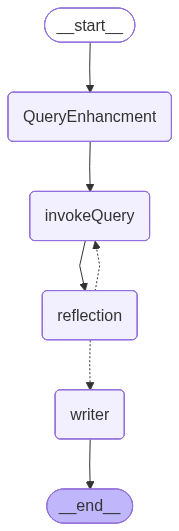

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response = graph.invoke({"query":"What is the Langgraph?"},config=config)

In [ ]:
response

{'query': 'What is the Langgraph?',
 'enhancmented_query': 'What is Langgraph, and what are its main purpose and features?',
 'basic_answer': 'LangGraph is an open‑source Python library for building, visualizing and executing state‑driven workflows that orchestrate large language models (LLMs). Its main purpose is to let developers compose complex, multi‑step LLM applications—such as agents, assistants, data pipelines or autonomous bots—by representing each step as a node in a directed graph and controlling the flow with edges that can branch, loop or recurse based on a shared mutable state. Key features include: declarative graph definition where nodes are simple Python callables (or LangChain chains, prompts, tools) and edges are defined with conditional or unconditional transitions; a global state object (a mutable dictionary or custom object) that is passed between nodes for context sharing and decision making; built‑in agent patterns for ReAct‑style reasoning, tool calling and sel

In [ ]:
pdisplay(response['query'])

What is the Langgraph?

None


In [ ]:
pdisplay(response['enhancmented_query'])

What is Langgraph, and what are its main purpose and features?

None


In [ ]:
pdisplay(response['basic_answer'])

LangGraph is an open‑source Python library for building, visualizing and executing state‑driven workflows that orchestrate large language models (LLMs). Its main purpose is to let developers compose complex, multi‑step LLM applications—such as agents, assistants, data pipelines or autonomous bots—by representing each step as a node in a directed graph and controlling the flow with edges that can branch, loop or recurse based on a shared mutable state. Key features include: declarative graph definition where nodes are simple Python callables (or LangChain chains, prompts, tools) and edges are defined with conditional or unconditional transitions; a global state object (a mutable dictionary or custom object) that is passed between nodes for context sharing and decision making; built‑in agent patterns for ReAct‑style reasoning, tool calling and self‑directed loops, enabling agents to decide their next actions autonomously; seamless integration with LangChain components; visualization utilities that render the workflow as Graphviz or Mermaid diagrams for debugging and documentation; support for asynchronous and parallel execution so independent branches can run concurrently; automatic checkpointing and resume capabilities that allow pausing, persisting and later resuming long‑running graphs; and native support for looping and recursion, including while‑loops and recursive sub‑graphs. Together these features provide a flexible, modular framework for constructing robust, controllable LLM‑driven systems.

None


In [ ]:
pdisplay(response['final_answer'])

**LangGraph** is an open‑source Python library for building, visualizing, and executing state‑driven workflows that orchestrate large language models (LLMs). It lets developers compose complex, multi‑step LLM applications—agents, assistants, data pipelines, autonomous bots—by representing each step as a node in a directed graph and controlling the flow with edges that can branch, loop, or recurse based on a shared mutable state.

### Key Features  

- **Declarative graph definition** – Nodes are simple Python callables (or LangChain chains, prompts, tools); edges are defined with conditional or unconditional transitions.  
- **Global mutable state** – A dictionary or custom object is passed between nodes, enabling context sharing and decision‑making.  
- **Built‑in agent patterns** – Supports ReAct‑style reasoning, tool calling, and self‑directed loops, allowing agents to choose their next actions autonomously.  
- **Seamless LangChain integration** – Works directly with existing LangChain components.  
- **Visualization utilities** – Render workflows as Graphviz or Mermaid diagrams for debugging and documentation.  
- **Asynchronous & parallel execution** – Independent branches can run concurrently.  
- **Checkpointing & resume** – Automatically pause, persist, and later resume long‑running graphs.  
- **Native looping & recursion** – Includes while‑loops and recursive sub‑graphs.

Together, these capabilities provide a flexible, modular framework for constructing robust, controllable LLM‑driven systems.

None


In [ ]:
pdisplay(response['messages'][-1].content)

**LangGraph** is an open‑source Python library for building, visualizing, and executing state‑driven workflows that orchestrate large language models (LLMs). It lets developers compose complex, multi‑step LLM applications—agents, assistants, data pipelines, autonomous bots—by representing each step as a node in a directed graph and controlling the flow with edges that can branch, loop, or recurse based on a shared mutable state.

### Key Features  

- **Declarative graph definition** – Nodes are simple Python callables (or LangChain chains, prompts, tools); edges are defined with conditional or unconditional transitions.  
- **Global mutable state** – A dictionary or custom object is passed between nodes, enabling context sharing and decision‑making.  
- **Built‑in agent patterns** – Supports ReAct‑style reasoning, tool calling, and self‑directed loops, allowing agents to choose their next actions autonomously.  
- **Seamless LangChain integration** – Works directly with existing LangChain components.  
- **Visualization utilities** – Render workflows as Graphviz or Mermaid diagrams for debugging and documentation.  
- **Asynchronous & parallel execution** – Independent branches can run concurrently.  
- **Checkpointing & resume** – Automatically pause, persist, and later resume long‑running graphs.  
- **Native looping & recursion** – Includes while‑loops and recursive sub‑graphs.

Together, these capabilities provide a flexible, modular framework for constructing robust, controllable LLM‑driven systems.

None


In [ ]:
print(response['messages'])

[HumanMessage(content='What is Langgraph', additional_kwargs={}, response_metadata={}, id='548876e7-7690-45f8-88a1-254fd2954b9f'), AIMessage(content='**LangGraph** is an open‑source Python library for building, visualizing, and executing state‑driven workflows with large language models (LLMs). It streamlines the creation of complex, multi‑step LLM applications—such as agents, assistants, or data pipelines—by offering a clear, graph‑based abstraction: each node represents a callable (e.g., an LLM prompt, a tool, or custom logic), and edges define the control flow based on the current state.\n\n### Key Features\n\n- **Graph‑based workflow definition**  \n  Declare nodes and edges declaratively. Graphs can be linear, branching, looping, or hierarchical.\n\n- **State management**  \n  A mutable state object travels through the graph, allowing nodes to read and update shared context.\n\n- **Conditional branching**  \n  Transitions can depend on state values or LLM outputs, enabling dynamic

## Sub-Graphs

Why sub-graphs

Reusable workflows

Encapsulating logic

Nested graphs

Sub-graph inputs & outputs

Composability

In [ ]:
class parent_state (BaseModel) : 
    parent_messages : Annotated[List[AnyMessage],add_messages]

In [ ]:
class subgraph_1 (BaseModel) :
    subgraph_1_messages : Annotated[List[AnyMessage],add_messages]


class subgraph_2 (BaseModel) :
    subgraph_2_messages : Annotated[List[AnyMessage],add_messages]


class subgraph_3 (BaseModel) :
    subgraph_3_messages : Annotated[List[AnyMessage],add_messages]

In [ ]:
def display_1_0 (state : subgraph_1) -> dict:
    print("subgraph10")
    state.subgraph_1_messages = "subgraph10"
    return {"subgraph_1_messages" : state.subgraph_1_messages}

def display_1_1 (state : subgraph_1) -> dict:
    print(state.subgraph_1_messages[-1].content + " Says Hello")
    state.subgraph_1_messages = state.subgraph_1_messages[-1].content + " Says Hello"
    return {"subgraph_1_messages" : state.subgraph_1_messages}

In [ ]:
subgraph_1_state_graph = StateGraph(subgraph_1)

subgraph_1_state_graph.add_node(display_1_0,"display_1_0")
subgraph_1_state_graph.add_node(display_1_1 ,"display_1_1")

subgraph_1_state_graph.add_edge(START,"display_1_0")
subgraph_1_state_graph.add_edge("display_1_0","display_1_1")
subgraph_1_state_graph.add_edge("display_1_1",END)

subgraph_1_state_graph = subgraph_1_state_graph.compile()


In [ ]:
def display_2_0 (state : subgraph_2) -> dict:
    print("subgraph20")
    state.subgraph_2_messages = "subgraph20"
    return {"subgraph_2_messages" : state.subgraph_2_messages}

def display_2_1 (state : subgraph_2) -> dict:
    print(state.subgraph_2_messages[-1].content + " Says Hello")
    state.subgraph_2_messages = state.subgraph_2_messages[-1].content + " Says Hello"
    return {"subgraph_2_messages" : state.subgraph_2_messages}

In [ ]:
subgraph_2_state_graph = StateGraph(subgraph_2)

subgraph_2_state_graph.add_node(display_2_0,"display_2_0")
subgraph_2_state_graph.add_node(display_2_1 ,"display_2_1")

subgraph_2_state_graph.add_edge(START,"display_2_0")
subgraph_2_state_graph.add_edge("display_2_0","display_2_1")
subgraph_2_state_graph.add_edge("display_2_1",END)

subgraph_2_state_graph = subgraph_2_state_graph.compile()

In [ ]:
def display_3_0 (state : subgraph_3) -> dict:
    print("subgraph30")
    state.subgraph_3_messages = "subgraph30"
    return {"subgraph_3_messages" : state.subgraph_3_messages}

def display_3_1 (state : subgraph_3) -> dict:
    print(state.subgraph_3_messages[-1].content + " Says Hello")
    state.subgraph_3_messages = state.subgraph_3_messages[-1].content + " Says Hello"
    return {"subgraph_3_messages" : state.subgraph_3_messages}

In [ ]:
subgraph_3_state_graph = StateGraph(subgraph_3)

subgraph_3_state_graph.add_node(display_3_0,"display_3_0")
subgraph_3_state_graph.add_node(display_3_1 ,"display_3_1")

subgraph_3_state_graph.add_edge(START,"display_3_0")
subgraph_3_state_graph.add_edge("display_3_0","display_3_1")
subgraph_3_state_graph.add_edge("display_3_1",END)

subgraph_3_state_graph = subgraph_3_state_graph.compile()

In [ ]:
def display_subgraph_1 (state : parent_state) -> dict:
    response_1 = subgraph_1_state_graph.invoke({
        "subgraph_1_messages" : state.parent_messages
    })
    print("Invoked SubGraph 1")
    return {"parent_messages":response_1['subgraph_1_messages']}
    

def display_subgraph_2 (state : parent_state) -> dict:
    response_2 = subgraph_2_state_graph.invoke({
        "subgraph_2_messages" : state.parent_messages
    })
    print("Invoked SubGraph 2")
    return {"parent_messages":response_2['subgraph_2_messages']}

def display_subgraph_3 (state : parent_state) -> dict:
    response_3 = subgraph_3_state_graph.invoke({
        "subgraph_3_messages" : state.parent_messages
    })
    print("Invoked SubGraph 3")
    return {"parent_messages":response_3['subgraph_3_messages']}

def display_all (state : parent_state) : 
    print(state.parent_messages)

In [ ]:
parent_graph = StateGraph(parent_state)

parent_graph.add_node(display_subgraph_1,"display_subgraph_1")
parent_graph.add_node(display_subgraph_2 ,"display_subgraph_2")
parent_graph.add_node(display_subgraph_3 ,"display_subgraph_3")
parent_graph.add_node(display_all,"display_all")

parent_graph.add_edge(START,"display_subgraph_1")
parent_graph.add_edge(START,"display_subgraph_2")
parent_graph.add_edge(START,"display_subgraph_3")
parent_graph.add_edge("display_subgraph_1","display_all")
parent_graph.add_edge("display_subgraph_2","display_all")
parent_graph.add_edge("display_subgraph_3","display_all")
parent_graph.add_edge("display_all",END)


parent_graph = parent_graph.compile()

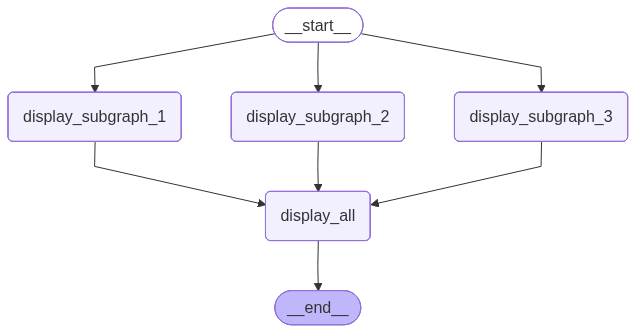

In [ ]:
display(Image(parent_graph.get_graph().draw_mermaid_png()))

In [ ]:
parent_graph.invoke(
    {
        "parent_messages" : "Go"
    }
)

subgraph10
subgraph10 Says Hello
Invoked SubGraph 1
subgraph20
subgraph20 Says Hello
Invoked SubGraph 2
subgraph30
subgraph30 Says Hello
Invoked SubGraph 3
[HumanMessage(content='Go', additional_kwargs={}, response_metadata={}, id='e4cf4744-bf47-4d85-b28c-893204ec0909'), HumanMessage(content='subgraph10', additional_kwargs={}, response_metadata={}, id='932312d8-dd8d-4c95-a49b-522c9b62ba35'), HumanMessage(content='subgraph10 Says Hello', additional_kwargs={}, response_metadata={}, id='02a429e5-b540-4096-9262-9bf2d47a750a'), HumanMessage(content='subgraph20', additional_kwargs={}, response_metadata={}, id='8f3da92f-d0f2-4c75-bb8f-910201efd0f0'), HumanMessage(content='subgraph20 Says Hello', additional_kwargs={}, response_metadata={}, id='1510d39e-05f6-4d58-8b00-d0a0ac422711'), HumanMessage(content='subgraph30', additional_kwargs={}, response_metadata={}, id='8257906d-905b-4da2-b9e7-0e31d6f59a7c'), HumanMessage(content='subgraph30 Says Hello', additional_kwargs={}, response_metadata={}, i

{'parent_messages': [HumanMessage(content='Go', additional_kwargs={}, response_metadata={}, id='e4cf4744-bf47-4d85-b28c-893204ec0909'),
  HumanMessage(content='subgraph10', additional_kwargs={}, response_metadata={}, id='932312d8-dd8d-4c95-a49b-522c9b62ba35'),
  HumanMessage(content='subgraph10 Says Hello', additional_kwargs={}, response_metadata={}, id='02a429e5-b540-4096-9262-9bf2d47a750a'),
  HumanMessage(content='subgraph20', additional_kwargs={}, response_metadata={}, id='8f3da92f-d0f2-4c75-bb8f-910201efd0f0'),
  HumanMessage(content='subgraph20 Says Hello', additional_kwargs={}, response_metadata={}, id='1510d39e-05f6-4d58-8b00-d0a0ac422711'),
  HumanMessage(content='subgraph30', additional_kwargs={}, response_metadata={}, id='8257906d-905b-4da2-b9e7-0e31d6f59a7c'),
  HumanMessage(content='subgraph30 Says Hello', additional_kwargs={}, response_metadata={}, id='7ad9b5d4-251b-4413-b89b-8bfa4de82f9a')]}

# 👥 Multi-Agent Systems

## Multi-Agent Systems

Agent roles

Planner agent

Retriever agent

Analyst agent

Answer agent

Critic agent

Tool-specialized agents

## Agent Coordination Patterns

Supervisor pattern

Hierarchical agents -> subgraphs

Network (peer-to-peer) - 
Swarm pattern

Debate pattern - 
Voting & consensus

In [ ]:
# Supervisor or (subagents) Pattern with built-in functions
subagent = create_agent(model=llm)

@tool("research",description="Research a topic and return findings")
def call_research_agent(query:str):
    result = subagent.invoke({"messages": [{"role": "user", "content": query}]})
    return result["messages"][-1].content

supervisor = create_agent(model=llm , tools=[call_research_agent])

In [ ]:
# Supervisor or (subagents) Pattern with Langgraph

from pydantic import Field
from langgraph.types import Command


class State(BaseModel) : 
    current_instructions : str
    data : str
    analysis : str

# 1. Define the Router Schema
class Router(BaseModel):
    """Decide which worker to call next."""
    next_worker: Literal["retriever", "analyst", "FINISH"]
    instructions: str = Field(description="Instructions for the next worker")

# 2. THE SUPERVISOR NODE
def supervisor_node(state: State):
    # The supervisor looks at the history and picks a worker
    # We use .with_structured_output to force it to choose a valid next step
    planner_llm = llm.with_structured_output(Router)
    decision = planner_llm.invoke(state["messages"])
    
    if decision.next_worker == "FINISH":
        return Command(goto=END)
    
    return Command(
        goto=decision.next_worker,
        update={"current_instructions": decision.instructions}
    )

# 3. THE WORKER NODES (They always return to the supervisor)
def retriever_node(state: State):
    # Perform retrieval...
    return Command(goto="supervisor", update={"data": "..."})

def analyst_node(state: State):
    # Perform analysis...
    return Command(goto="supervisor", update={"analysis": "..."})

# Graph

builder = StateGraph(State)

builder.add_node("supervisor", supervisor_node)
builder.add_node("retriever", retriever_node)
builder.add_node("analyst", analyst_node)

builder.add_edge(START, "supervisor")
# Note: No 'add_edge' needed for workers because they use Command(goto="supervisor")

graph = builder.compile()

# 📄 Knowledge Layer (RAG Core)

## Document Ingestion

File loaders (PDF, DOCX, HTML, TXT)

Metadata extraction

Cleaning & normalization

Language detection

OCR pipelines

Incremental ingestion

Versioning documents

In [ ]:
# File Loaders 
from pathlib import Path
from langchain_classic.document_loaders import PyPDFLoader

data_dir = Path("data")

documents = []

for pdf_path in data_dir.glob("*.pdf") : #or glob("*.*")
    loader = PyPDFLoader(str(pdf_path))
    documents.extend(loader.load())

print(f"Loaded {len(documents)} pages from PDFs")

Loaded 8 pages from PDFs


In [ ]:
# Metadata Extraction
for doc in documents : 
    print(doc.metadata)

{'producer': 'Microsoft® Office Word 2007', 'creator': 'Microsoft® Office Word 2007', 'creationdate': 'D:20190612155410', 'title': 'HELWAN CHEMICAL INDUSTRIES           حلوان للصناعات الكيماوية                                                   (HELWAN CHEM)                                                                                                (حلوان كيم)', 'author': '//', 'moddate': 'D:20190612155410', 'source': 'data\\HC  HELCHROM 66L..pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}
{'producer': 'Microsoft® Office Word 2007', 'creator': 'Microsoft® Office Word 2007', 'creationdate': 'D:20190612155410', 'title': 'HELWAN CHEMICAL INDUSTRIES           حلوان للصناعات الكيماوية                                                   (HELWAN CHEM)                                                                                                (حلوان كيم)', 'author': '//', 'moddate': 'D:20190612155410', 'source': 'data\\HC  HELCHROM 66L..pdf', 'total_pages': 2, 'page': 1, 'page_label':

In [ ]:
# OCR Pipelines
#!pip install pytesseract pdf2image pillow opencv-pythonimport pytesseract
from pdf2image import convert_from_path
from pathlib import Path

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

def ocr_pdf(pdf_path: Path, lang="eng+ara"):
    images = convert_from_path(pdf_path)
    text_pages = []

    for img in images:
        text = pytesseract.image_to_string(img, lang=lang)
        text_pages.append(text)

    return text_pages

In [12]:
# or 
from langchain_classic.document_loaders import PyPDFLoader
loader = PyPDFLoader("Surface_Treatment_of_Metals.pdf")
documents = loader.load()

## Embedding Initialization

Embedding model types

Dimensionality considerations

Domain-specific embeddings

Chunk-level vs document-level embeddings

Re-embedding strategies

Embedding caching

Evaluation of embeddings

##### Embedding Model Types

- Dense Embeddings
- Sparse Embeddings
- Hyprid 

In [4]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(     
    model = "all-MiniLM-L6-v2",
)
embeddings

HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

# Text Chunking

Fixed vs recursive chunking

Semantic chunking

Overlap strategies

Token-based vs character-based

Adaptive chunking

Hierarchical chunking

Chunk metadata design

In [8]:
txt_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 800,
    chunk_overlap = 80
)
semantic_txt_splitter = SemanticChunker(
    embeddings=embeddings,
    breakpoint_threshold_type="percentile"
)

In [13]:
chunks = txt_splitter.split_documents(documents)
semantic_chunks = semantic_txt_splitter.split_documents(documents)

In [15]:
chunks

[Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2022-04-21T20:10:03+08:00', 'author': 'Petrica Vizureanu', 'keywords': '', 'moddate': '2022-04-22T02:33:21+02:00', 'subject': '', 'title': 'Surface Treatment of Metals', 'source': 'Surface_Treatment_of_Metals.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='Citation: Vizureanu, P . Surface\nTreatment of Metals. Coatings 2022,\n12, 560. https://doi.org/10.3390/\ncoatings12050560\nReceived: 21 February 2022\nAccepted: 14 April 2022\nPublished: 20 April 2022\nPublisher’s Note:MDPI stays neutral\nwith regard to jurisdictional claims in\npublished maps and institutional afﬁl-\niations.\nCopyright: © 2022 by the author.\nLicensee MDPI, Basel, Switzerland.\nThis article is an open access article\ndistributed under the terms and\nconditions of the Creative Commons\nAttribution (CC BY) license (https://\ncreativecommons.org/licenses/by/\n4.0/).\ncoatings\nEditorial\nSurface T

In [ ]:
semantic_chunks

[Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2022-04-21T20:10:03+08:00', 'author': 'Petrica Vizureanu', 'keywords': '', 'moddate': '2022-04-22T02:33:21+02:00', 'subject': '', 'title': 'Surface Treatment of Metals', 'source': 'Surface_Treatment_of_Metals.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}, page_content='Citation: Vizureanu, P . Surface\nTreatment of Metals. Coatings 2022,\n12, 560. https://doi.org/10.3390/\ncoatings12050560\nReceived: 21 February 2022\nAccepted: 14 April 2022\nPublished: 20 April 2022\nPublisher’s Note:MDPI stays neutral\nwith regard to jurisdictional claims in\npublished maps and institutional afﬁl-\niations. Copyright: © 2022 by the author.'),
 Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2022-04-21T20:10:03+08:00', 'author': 'Petrica Vizureanu', 'keywords': '', 'moddate': '2022-04-22T02:33:21+02:00', 'subject': '', 'title': 'Surface Treatm

In [20]:
# Metadata Extraction
for doc in chunks : 
    print(doc.metadata)

{'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2022-04-21T20:10:03+08:00', 'author': 'Petrica Vizureanu', 'keywords': '', 'moddate': '2022-04-22T02:33:21+02:00', 'subject': '', 'title': 'Surface Treatment of Metals', 'source': 'Surface_Treatment_of_Metals.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}
{'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2022-04-21T20:10:03+08:00', 'author': 'Petrica Vizureanu', 'keywords': '', 'moddate': '2022-04-22T02:33:21+02:00', 'subject': '', 'title': 'Surface Treatment of Metals', 'source': 'Surface_Treatment_of_Metals.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}
{'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2022-04-21T20:10:03+08:00', 'author': 'Petrica Vizureanu', 'keywords': '', 'moddate': '2022-04-22T02:33:21+02:00', 'subject': '', 'title': 'Surface Treatment of Metals', 'source': 'Surface_Treatment_of_Metals.pdf', 'total_pages'

In [21]:
# Metadata Extraction
for doc in semantic_chunks : 
    print(doc.metadata)

{'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2022-04-21T20:10:03+08:00', 'author': 'Petrica Vizureanu', 'keywords': '', 'moddate': '2022-04-22T02:33:21+02:00', 'subject': '', 'title': 'Surface Treatment of Metals', 'source': 'Surface_Treatment_of_Metals.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}
{'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2022-04-21T20:10:03+08:00', 'author': 'Petrica Vizureanu', 'keywords': '', 'moddate': '2022-04-22T02:33:21+02:00', 'subject': '', 'title': 'Surface Treatment of Metals', 'source': 'Surface_Treatment_of_Metals.pdf', 'total_pages': 2, 'page': 0, 'page_label': '1'}
{'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2022-04-21T20:10:03+08:00', 'author': 'Petrica Vizureanu', 'keywords': '', 'moddate': '2022-04-22T02:33:21+02:00', 'subject': '', 'title': 'Surface Treatment of Metals', 'source': 'Surface_Treatment_of_Metals.pdf', 'total_pages'

## Vector Store

Vector DB selection (FAISS, Chroma, Pinecone, Qdrant)

Index types

Persistence & reload

Hybrid (vector + keyword)

Filtering with metadata

Namespaces & collections

Sharding strategies

In [ ]:
vectordb = FAISS.from_documents(
    documents=documents,
    embedding=embeddings
)

# there are chroma , pinecone

## Retriever Design

Similarity search

MMR (Max Marginal Relevance)

Hybrid retrievers

Sparse 

Dense

In [22]:
from langchain_community.retrievers import BM25Retriever
sparse_retriever = BM25Retriever.from_documents(chunks)
sparse_retriever.k = 9

In [23]:
dense_retriever = vectordb.as_retriever()

In [24]:
from langchain_classic.retrievers import EnsembleRetriever
hybrid_reetriever = EnsembleRetriever(
    retrievers=[dense_retriever,sparse_retriever],
    weights=[0.7,0.3]
)

# 🔁 Classical RAG

## Basic RAG Pipeline

Query → Retrieve → Generate

Prompt templates

Context injection

Source attribution

Hallucination mitigation

RAG chain evaluation

## Advanced RAG Prompting

Instruction-driven RAG

Citation-aware prompts

Refusal & uncertainty handling

Multi-context synthesis

Chain-of-thought hiding

Answer grounding techniques

## Query Understanding

Intent classification

Query rewriting

Query expansion

Multi-query generation

Question decomposition

## Document Grading

Relevance scoring

Binary relevance

Confidence thresholds

LLM-based graders

Rule-based graders

## Context Compression

Reranking

Context summarization

Token budgeting

Dynamic context selection

Lost-in-the-middle mitigation

# 🧠 Graph-Based RAG

## RAG as a Graph

Retrieval node

Grading node

Answer node

Rewrite query node

Fallback paths

Graph visualization

# 🤖 Agentic RAG

## Agentic RAG

RAG as a tool

Reason → Retrieve → Reflect

Iterative retrieval

Self-refinement loops

Thought-action separation

Confidence-aware answering

# 🧬 Autonomous RAG

## Autonomous RAG

Goal-driven RAG

Self-initiated retrieval

Autonomous query planning

Task decomposition

Memory-driven decisions

Stopping conditions

# 🛡️ Production Layer

## Error Handling & Recovery

Tool failures

Empty retrieval

Hallucination detection

Retry strategies

Safe fallback responses

## Security & Guardrails

Prompt injection defense

Data leakage prevention

Tool access control

Output validation

Policy enforcement

## Optimization & Scaling

Caching strategies

Batch retrieval

Async graphs

Parallel agents

Streaming responses

Production deployment tips

## Evaluation & Monitoring

Retrieval metrics

Answer correctness

Faithfulness

Latency

Cost tracking

Logging agent decisions